# Análisis de muestra de grafo extraído de facebook

## Secuencia de grados

1. Importar los paquetes

In [1]:
%matplotlib inline
import FuncionesGrafos as fg
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

2. Cargar la secuencia de grados desde los archivos de nodos y aristas

In [2]:
Sg = fg.extrae_secuencia_grados(
    './input/facebook_nodos.csv', 
    './input/facebook_aristas.csv'
)

3. Crear las columnas 'i', y 'fi' de la tabla de distribución de frecuencias

In [3]:
i, fi = [], []
for g  in Sg:
    if g in i:
        fi[i.index(g)] += 1
    else:
        i.append(g)
        fi.append(1)

In [4]:
Fi = []
Fi.append(fi[0])
for u in np.arange(1, len(fi)):
    Fi.append(fi[u] + Fi[u - 1])
hi = []
for u in fi:
    hi.append(u / Fi[-1])
Hi = []
Hi.append(hi[0])
for u in np.arange(1, len(hi)):
    Hi.append(hi[u] + Hi[u - 1])

4. Armar la tabla de distribución de frecuencias

In [5]:
d = {
    'fi' : pd.Series(fi, index=i),
    'Fi' : pd.Series(Fi, index=i),
    'hi' : pd.Series(hi, index=i),
    'Hi' : pd.Series(Hi, index=i)
}
tabla = pd.DataFrame(d, columns=['fi', 'hi', 'Fi', 'Hi'])
tabla.index.name = 'i'

4. Obtención de la gráfica de la distribución de frecuencias

Text(0.5,1,'Distribución de frecuencias de los grados del grafo')

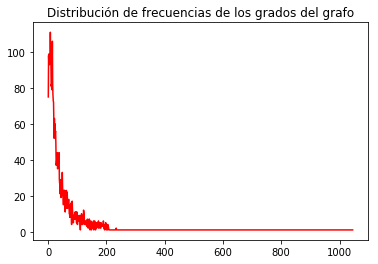

In [6]:
plt.plot(i, fi, 'red')
plt.title(u'Distribución de frecuencias de los grados del grafo')

In [7]:
# Datos estadísticos
i = np.array(i)
fi = np.array(fi)
media = np.mean(Sg)
mediana = np.median(Sg)
varianza = np.var(Sg)

In [8]:
media, mediana, varianza

(43.69101262688784, 25.0, 2747.2395107101647)

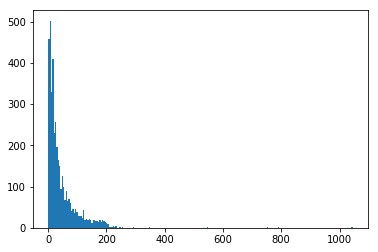

In [9]:
histograma = plt.hist(Sg, len(i), histtype='stepfilled')

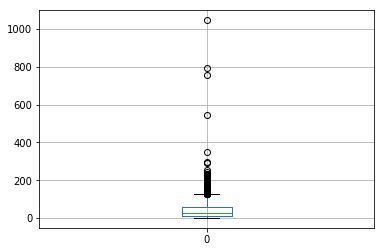

In [10]:
grados = pd.DataFrame(Sg)
grados.boxplot()

In [11]:
Q1 = np.percentile(Sg, 25)
Q2 = np.percentile(Sg, 50)
Q3 = np.percentile(Sg, 75)
Q4 = np.percentile(Sg, 100)
Q1, Q2, Q3, Q4

(11.0, 25.0, 57.0, 1045.0)

## Datos de grafo

In [12]:
nodos = pd.read_csv('./input/facebook_nodos.csv')
enlaces = pd.read_csv('./input/facebook_aristas.csv')
N = np.array(nodos['Id'])
E = []
for y in np.arange(len(enlaces)):
    E.append((enlaces.iloc[y,0], enlaces.iloc[y,1]))

In [13]:
G = fg.n_networkx(N, E)
fg.mostrar_datos(G)

Cantidad de nodos: 4039
Cantidad de enlaces: 88234
Coef. Transitividad: 0.5192
Coef. agrupamiento promedio: 0.6055
Cantidad de triangulos: 1612010


5. Exportar la tabla de distribución de frecuencias

In [14]:
tabla.to_csv('TablaDistFrec.csv', sep=';', encoding='utf-8')

# Experimentación

In [15]:
# cantidad: cantidad de nodos
cantidad = 500
Sg2 = []
# hi*N
hin = []
for h in hi:
    hin.append(round(cantidad * h))

In [17]:
# cantidad de grados diferentes de 0
cant_n_0 = 0
for h in hin:
    if h > 0:
        cant_n_0 += 1
cant_n_0

141

In [18]:
len(N)/len(i), cantidad/cant_n_0

(17.792951541850222, 3.5460992907801416)

In [19]:
len(N)

4039

In [20]:
len(i)

227

In [21]:
cantidad / 17.79

28.10567734682406

In [25]:
RIC = Q3 - Q1
bi = Q1 - 1.5 * RIC
bs = Q3 + 1.5 * RIC

In [26]:
bs

126.0

In [27]:
can_sup_bs = 0
for g in Sg:
    if g >= bs:
        can_sup_bs += 1

In [28]:
can_sup_bs

315